In [87]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

SETUP GLOBAL PARAMETERS

In [88]:
### SETTING THE GLOBAL PARAMETERS

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)

NOISE = 0.2
TEST_SIZE = 0.2
ALPHA = 0.1
N_SAMPLES = 1000
EPOCHS = 1000

In [89]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

In [90]:
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

In [91]:
data_df = pd.DataFrame(X, columns = ['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [92]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [93]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


<Axes: xlabel='target'>

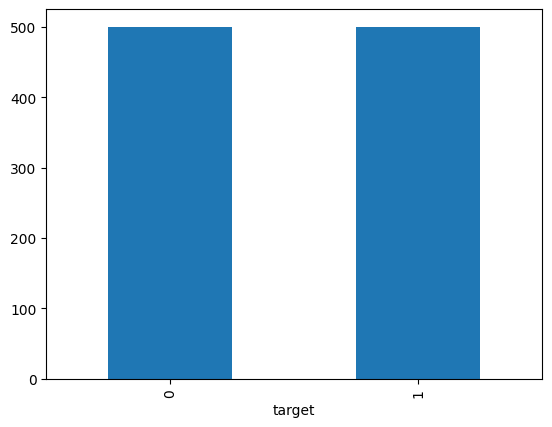

In [94]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax = ax, kind = 'bar')

<Axes: xlabel='A', ylabel='B'>

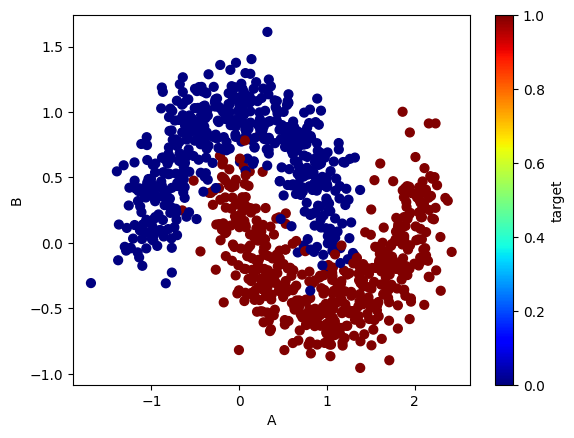

In [95]:
data_df.plot.scatter('A','B', s=40, c= 'target', cmap = plt.cm.jet)

In [96]:
data_train, data_test = data_df.to_numpy()[:900] , data_df.to_numpy()[900:]

type(data_train) , type(data_test)

(numpy.ndarray, numpy.ndarray)

CODING FOR THE EQUATION OF  `z`  TO MAKE PREDICTION

In [ ]:
def fn_sigmoid(z):
     return 1.0 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [97]:
def predict(row, weights):

  z = weights[0]           # start z from w0

  for i in range(len(row) - 1):

    z += weights[i+1]*row[i]        # x1.w1 + x2.w2

  # return 1 if z>=0 else 0
  return fn_sigmoid(z)

In [98]:
weights = np.array([0.1, 2.0, 1.0])

display(data_df.iloc[0])

predict(data_df.iloc[0] , weights)

,0
A,0.906340
B,0.902676
target,0.000000


<ipython-input-97-0b76cad1399f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z += weights[i+1]*row[i]        # x1.w1 + x2.w2


1

In [99]:
def train_weights(train, alpha, n_epoch):

  errors = []

  weights = rng.random(train.shape[1])

  m = train.shape[0]

  for epoch in range(n_epoch):

    sum_error = 0.0

    for row in train:

      prediction = predict(row, weights)

      dz = prediction - row[-1]

      error = -row[-1]*np.log(prediction)

      # sum_error += (prediction - row[-1])**2

      sum_error += error
      weights[0] = weights[0] - alpha * dz / m

      for i in range(len(row) - 1):

        weights [i+1] = weights[i+1] - alpha * dz * row[i] / m

    errors.append(sum_error/m)

  return weights, errors

In [100]:
weights, errors = train_weights(data_train, ALPHA, EPOCHS)

display(weights, errors)

array([-6.44966640e-05,  2.65647909e-04, -4.29815069e-04])

[np.float64(0.46),
 np.float64(0.45),
 np.float64(0.4388888888888889),
 np.float64(0.43),
 np.float64(0.42333333333333334),
 np.float64(0.42444444444444446),
 np.float64(0.42),
 np.float64(0.4211111111111111),
 np.float64(0.43444444444444447),
 np.float64(0.43555555555555553),
 np.float64(0.4477777777777778),
 np.float64(0.46111111111111114),
 np.float64(0.47444444444444445),
 np.float64(0.47333333333333333),
 np.float64(0.47888888888888886),
 np.float64(0.47),
 np.float64(0.46444444444444444),
 np.float64(0.44333333333333336),
 np.float64(0.43333333333333335),
 np.float64(0.4222222222222222),
 np.float64(0.41444444444444445),
 np.float64(0.4077777777777778),
 np.float64(0.39666666666666667),
 np.float64(0.38555555555555554),
 np.float64(0.37444444444444447),
 np.float64(0.3611111111111111),
 np.float64(0.34555555555555556),
 np.float64(0.3388888888888889),
 np.float64(0.3277777777777778),
 np.float64(0.3211111111111111),
 np.float64(0.3111111111111111),
 np.float64(0.3011111111111111)

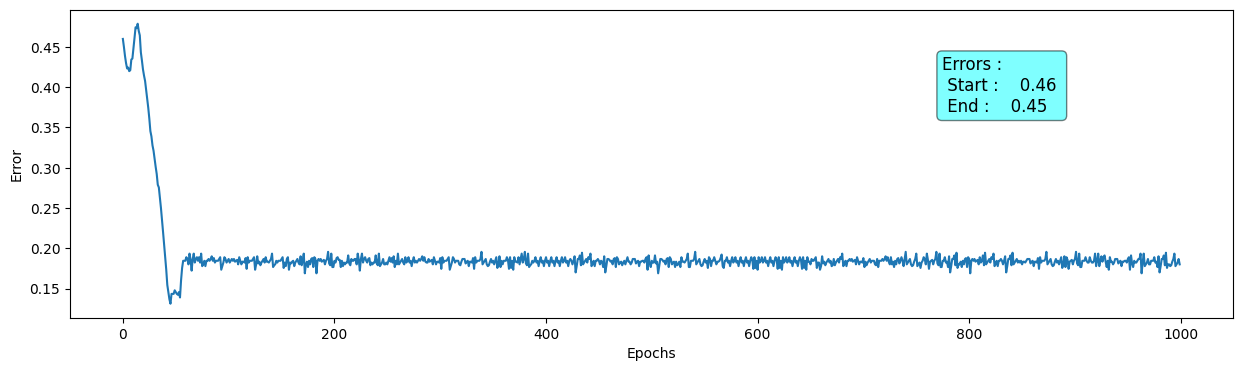

In [101]:
fig , ax = plt.subplots(figsize =  (15,4))
txtstr = "Errors : \n Start : {:7.2f} \n End : {:7.2f}".format(errors[0], errors[1])

props = dict(boxstyle = 'round', facecolor = 'cyan', alpha =0.5)

ax.text(0.75, 0.85, txtstr, transform=ax.transAxes, fontsize=12, verticalalignment = 'top', bbox= props)

ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.plot(errors)

## Predictions

In [102]:
predictions = []
for row in data_train:
  pred = predict(row, weights)

  predictions.append(pred)

print(f'Accuracy : {accuracy_score (data_train[:, -1], predictions):7.4f}')

Accuracy :  0.8411


In [103]:
predictions = []
for row in data_test:
  pred = predict(row, weights)

  predictions.append(pred)

print(f'Accuracy : {accuracy_score (data_test[:, -1], predictions):7.4f}')

Accuracy :  0.8900


In [104]:
cm = confusion_matrix(data_test[:, -1], predictions)
display(cm)

array([[54,  4],
       [ 7, 35]])

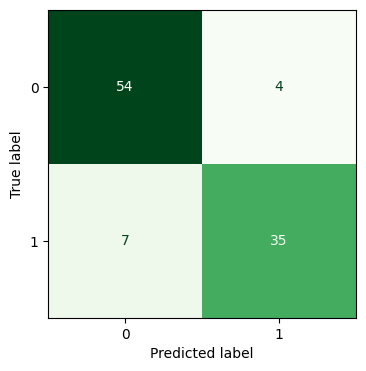

In [105]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(4,4))

disp.plot(ax=ax, cmap= 'Greens', colorbar=False);

In [112]:
def fn_plot_decision_boundary(x, wts):
    fig, ax = plt.subplots(figsize = (15,5))
    dm = 0.05
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]
    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

    y_pred = []

    for row in (XX):
        y_p = predict(row, weights=wts)
        y_pred.append(y_p)

    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx,yy,Z, alpha = 0.6, cmap= plt.cm.Paired)
    ax.scatter(X[:,0] , X[:,1], c = y, s=15, edgecolor='k', cmap=plt.cm.bwr);
    return xx, yy, Z


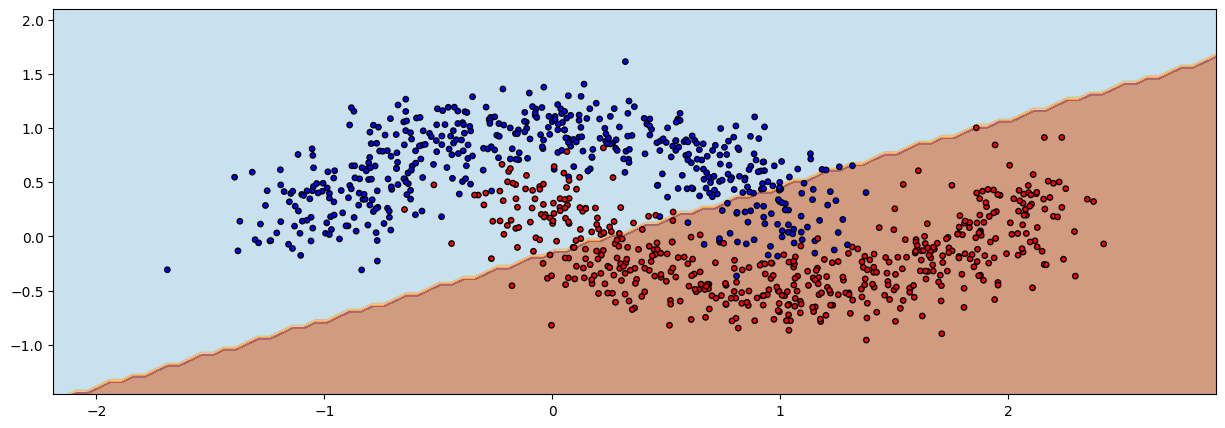

In [113]:
y_pred = fn_plot_decision_boundary(data_train, weights)

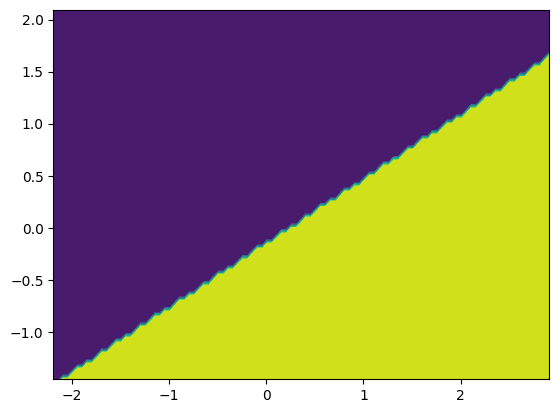

In [114]:
xx, yy, Z = y_pred
plt.contourf(xx, yy, Z)

In [115]:
xx.shape, yy.shape, Z.shape

((72, 103), (72, 103), (72, 103))